# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, r2_score
import random
from datetime import datetime, timedelta

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('marketing_campaign_data_messy.csv')
df

,Campaign_ID,Campaign_Name,Start_Date,End_Date,Channel,Impressions,Clicks,Spend,Conversions,Active,Clicks,Campaign_Tag
0,CMP-00001,Q4_Summer_CMP-00001,2023-11-24 00:00:00,2023-12-13,TikTok,16795,197,$102.82,20.0,Y,NaN,TI
1,CMP-00002,Q1_Launch_CMP-00002,2023-05-06 00:00:00,2023-05-12,Facebook,1860,30,24.33,1.0,0,NaN,FA
2,CMP-00003,Q3_Winter_CMP-00003,2023-12-13 00:00:00,2023-12-20,Email,77820,843,1323.39,51.0,No,NaN,EM
3,CMP-00004,Q1_BlackFriday_CMP-00004,2023-10-30,2023-11-03,TikTok,55886,2019,2180.38,135.0,True,NaN,TI
4,CMP-00005,Q2_Winter_CMP-00005,2023-04-22 00:00:00,2023-04-23,Facebook,7265,169,252.44,30.0,Yes,NaN,FA
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,CMP-00400,Q3_Summer_CMP-00400,2023-10-31 00:00:00,2023-11-13,TikTok,30592,586,$503.95,77.0,1,NaN,TI
2016,CMP-01255,Q4_Summer_CMP-01255,2023-09-01 00:00:00,2023-09-26,Google Ads,20097,897,1641.0,162.0,0,NaN,GO
2017,CMP-01050,Q2_Launch_CMP-01050,2023-02-09 00:00:00,2023-02-21,Instagram,33254,1117,883.82,214.0,0,NaN,IN
2018,CMP-01118,Q4_Winter_CMP-01118,2023-03-30 00:00:00,2023-04-27,Facebook,68728,2960,4198.5,591.0,Yes,NaN,FA


### Explore The Dataset

In [3]:
df.shape

(2020, 12)

In [4]:
df.describe()

,Impressions,Clicks,Conversions,Clicks
count,2020.000000,2020.000000,1820.000000,40.000000
mean,49839.896040,1500.744059,186.085714,54856.200000
std,28579.637473,1084.765654,160.129172,30552.773369
min,1055.000000,11.000000,0.000000,2508.000000
25%,25033.500000,650.750000,68.000000,30164.750000
50%,50097.500000,1245.000000,142.000000,57707.500000
75%,74784.250000,2185.250000,257.000000,81497.500000
max,99875.000000,4812.000000,943.000000,99483.000000


In [5]:
df.nunique()

 Campaign_ID     2000
Campaign_Name    2000
Start_Date        624
End_Date          387
Channel            10
Impressions      1983
Clicks           1503
Spend            1993
Conversions       528
Active              7
Clicks             40
Campaign_Tag        8
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0    Campaign_ID   2020 non-null   object 
 1   Campaign_Name  2020 non-null   object 
 2   Start_Date     2020 non-null   object 
 3   End_Date       2020 non-null   object 
 4   Channel        1919 non-null   object 
 5   Impressions    2020 non-null   int64  
 6   Clicks         2020 non-null   int64  
 7   Spend          2020 non-null   object 
 8   Conversions    1820 non-null   float64
 9   Active         2020 non-null   object 
 10  Clicks         40 non-null     float64
 11  Campaign_Tag   2020 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 189.5+ KB


### Exploratory Data Analysis

#### 1. Column Fix

In [7]:
print(df.columns.tolist())

[' Campaign_ID ', 'Campaign_Name', 'Start_Date', 'End_Date', 'Channel', 'Impressions', 'Clicks ', 'Spend', 'Conversions', 'Active', 'Clicks', 'Campaign_Tag']


In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())

['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel', 'impressions', 'clicks', 'spend', 'conversions', 'active', 'clicks', 'campaign_tag']


#### 2. Conversion Rate Cleanup

In [9]:
cam_spend_mask = df['spend'].astype(str).str.contains(r'\$')

print(df.loc[cam_spend_mask,['campaign_id','spend']].head(3))

   campaign_id     spend
0    CMP-00001   $102.82
21   CMP-00022   $2428.4
22   CMP-00023  $4726.22


In [10]:
df['spend'] = df['spend'].astype(str).str.replace(r'[^\d.-]', '', regex=True)
df['spend'] = pd.to_numeric(df['spend'])

In [11]:
print(df.loc[cam_spend_mask,['campaign_id','spend']].head(10))

   campaign_id    spend
0    CMP-00001   102.82
21   CMP-00022  2428.40
22   CMP-00023  4726.22
31   CMP-00032  2759.35
32   CMP-00033  2393.02
36   CMP-00037  2136.63
37   CMP-00038  1118.15
40   CMP-00041   205.48
53   CMP-00054   919.99
55   CMP-00056  3219.35


#### 3. Categorical Typos

In [12]:
print(df['channel'].unique())

['TikTok' 'Facebook' 'Email' 'Instagram' 'Google Ads' 'E-mail' nan 'Gogle'
 'Tik_Tok' 'Facebok' 'Insta_gram']


In [13]:
channel_map = {
    'Facebok': 'Facebook',
    'Insta_gram': 'Instagram',
    'Gogle': 'Google Ads',
    'Tik_Tok': 'TikTok',
    'E-mail': 'Email',
    'N/A': np.nan 
}

df['channel'] = df['channel'].replace(channel_map)


print(df['channel'].unique())

['TikTok' 'Facebook' 'Email' 'Instagram' 'Google Ads' nan]


#### 4. Boolean Values

In [14]:
print(df['active'].unique())

['Y' '0' 'No' 'True' 'Yes' '1' 'False']


In [15]:
bool_map = {
   
    'Yes': True,
    'Y': True,
    '1': True,
     1: True,
     'No': False,
     '0': False,
     0: False
}


df['active'] = df['active'].map(bool_map).fillna(False).astype(bool)

print(df['active'].unique())

[ True False]


#### 5. Dates

In [16]:
print(df['start_date'].dtype)

object


In [17]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['start_date']

0      2023-11-24
1      2023-05-06
2      2023-12-13
3             NaT
4      2023-04-22
          ...    
2015   2023-10-31
2016   2023-09-01
2017   2023-02-09
2018   2023-03-30
2019   2023-06-26
Name: start_date, Length: 2020, dtype: datetime64[ns]

In [18]:
df['end_date'] = pd.to_datetime(df['end_date'], dayfirst=True, errors='coerce')

print(df['start_date'].dtype)
print(df['end_date'].dtype)

datetime64[ns]
datetime64[ns]


In [19]:
df = df.loc[:, ~df.columns.duplicated()]

In [20]:
df

,campaign_id,campaign_name,start_date,end_date,channel,impressions,clicks,spend,conversions,active,campaign_tag
0,CMP-00001,Q4_Summer_CMP-00001,2023-11-24,2023-12-13,TikTok,16795,197,102.82,20.0,True,TI
1,CMP-00002,Q1_Launch_CMP-00002,2023-05-06,2023-05-12,Facebook,1860,30,24.33,1.0,False,FA
2,CMP-00003,Q3_Winter_CMP-00003,2023-12-13,2023-12-20,Email,77820,843,1323.39,51.0,False,EM
3,CMP-00004,Q1_BlackFriday_CMP-00004,NaT,2023-11-03,TikTok,55886,2019,2180.38,135.0,False,TI
4,CMP-00005,Q2_Winter_CMP-00005,2023-04-22,2023-04-23,Facebook,7265,169,252.44,30.0,True,FA
...,...,...,...,...,...,...,...,...,...,...,...
2015,CMP-00400,Q3_Summer_CMP-00400,2023-10-31,2023-11-13,TikTok,30592,586,503.95,77.0,True,TI
2016,CMP-01255,Q4_Summer_CMP-01255,2023-09-01,2023-09-26,Google Ads,20097,897,1641.00,162.0,False,GO
2017,CMP-01050,Q2_Launch_CMP-01050,2023-02-09,2023-02-21,Instagram,33254,1117,883.82,214.0,False,IN
2018,CMP-01118,Q4_Winter_CMP-01118,2023-03-30,2023-04-27,Facebook,68728,2960,4198.50,591.0,True,FA


#### 6. Logical Integrity

In [21]:
make_sense_mask = df['clicks'] > df['impressions']

print(df.loc[make_sense_mask,['campaign_id','impressions','clicks']].head(10))

Empty DataFrame
Columns: [campaign_id, impressions, clicks]
Index: []


#### 7. Time Travel Campaign Date

In [22]:
time_travel_mask = df['end_date'] < df['start_date']

print(df.loc[time_travel_mask,['campaign_id','start_date','end_date']].head(10))

    campaign_id start_date   end_date
23    CMP-00024 2023-05-06 2023-05-01
54    CMP-00055 2023-09-01 2023-08-27
71    CMP-00072 2023-02-01 2023-01-27
156   CMP-00157 2023-12-06 2023-12-01
200   CMP-00201 2023-01-11 2023-01-06
218   CMP-00219 2023-10-03 2023-09-28
221   CMP-00222 2023-08-26 2023-08-21
280   CMP-00281 2023-12-10 2023-12-05
303   CMP-00304 2023-05-17 2023-05-12
346   CMP-00347 2023-11-07 2023-11-02


In [23]:
df.loc[time_travel_mask, 'end_date'] = df.loc[time_travel_mask, 'start_date'] + pd.Timedelta(days=30)

print(df.loc[time_travel_mask,['campaign_id','start_date','end_date']].head(10))

    campaign_id start_date   end_date
23    CMP-00024 2023-05-06 2023-06-05
54    CMP-00055 2023-09-01 2023-10-01
71    CMP-00072 2023-02-01 2023-03-03
156   CMP-00157 2023-12-06 2024-01-05
200   CMP-00201 2023-01-11 2023-02-10
218   CMP-00219 2023-10-03 2023-11-02
221   CMP-00222 2023-08-26 2023-09-25
280   CMP-00281 2023-12-10 2024-01-09
303   CMP-00304 2023-05-17 2023-06-16
346   CMP-00347 2023-11-07 2023-12-07


#### 8. Outliers

In [24]:
Q1 = df['spend'].quantile(0.25)
Q3 = df['spend'].quantile(0.75)

IQR = Q3 - Q1
upper_limit = Q3 + (3 * IQR)

outlier_mask = df['spend'] > upper_limit
print(df.loc[outlier_mask,['campaign_id','spend']].head(10))

     campaign_id      spend
789    CMP-00790  500000.00
1443   CMP-01444    8921.51
1460   CMP-01461  500000.00
1718   CMP-01719  500000.00
1754   CMP-01755  500000.00
1781   CMP-01782  500000.00


In [25]:
df.loc[outlier_mask, 'spend'] = upper_limit
print(df.loc[outlier_mask,['campaign_id','spend']].head(10))

     campaign_id      spend
789    CMP-00790  8603.5375
1443   CMP-01444  8603.5375
1460   CMP-01461  8603.5375
1718   CMP-01719  8603.5375
1754   CMP-01755  8603.5375
1781   CMP-01782  8603.5375


#### 9. Feature Extraction

In [26]:
print(df['campaign_name'].head(10))

0         Q4_Summer_CMP-00001
1         Q1_Launch_CMP-00002
2         Q3_Winter_CMP-00003
3    Q1_BlackFriday_CMP-00004
4         Q2_Winter_CMP-00005
5    Q4_BlackFriday_CMP-00006
6         Q3_Launch_CMP-00007
7         Q4_Launch_CMP-00008
8    Q4_BlackFriday_CMP-00009
9         Q2_Winter_CMP-00010
Name: campaign_name, dtype: object


In [27]:
df['season'] = df['campaign_name'].str.extract(r'Q\d_([^_]+)_')

print(df[['campaign_name','season']].head(10))

              campaign_name       season
0       Q4_Summer_CMP-00001       Summer
1       Q1_Launch_CMP-00002       Launch
2       Q3_Winter_CMP-00003       Winter
3  Q1_BlackFriday_CMP-00004  BlackFriday
4       Q2_Winter_CMP-00005       Winter
5  Q4_BlackFriday_CMP-00006  BlackFriday
6       Q3_Launch_CMP-00007       Launch
7       Q4_Launch_CMP-00008       Launch
8  Q4_BlackFriday_CMP-00009  BlackFriday
9       Q2_Winter_CMP-00010       Winter


In [28]:
df.isna().sum()

campaign_id        0
campaign_name      0
start_date       333
end_date           0
channel          101
impressions        0
clicks             0
spend              0
conversions      200
active             0
campaign_tag       0
season             0
dtype: int64

In [29]:
df.duplicated().sum()

19

In [30]:
df.fillna(0, inplace=True)
df

,campaign_id,campaign_name,start_date,end_date,channel,impressions,clicks,spend,conversions,active,campaign_tag,season
0,CMP-00001,Q4_Summer_CMP-00001,2023-11-24 00:00:00,2023-12-13,TikTok,16795,197,102.82,20.0,True,TI,Summer
1,CMP-00002,Q1_Launch_CMP-00002,2023-05-06 00:00:00,2023-05-12,Facebook,1860,30,24.33,1.0,False,FA,Launch
2,CMP-00003,Q3_Winter_CMP-00003,2023-12-13 00:00:00,2023-12-20,Email,77820,843,1323.39,51.0,False,EM,Winter
3,CMP-00004,Q1_BlackFriday_CMP-00004,0,2023-11-03,TikTok,55886,2019,2180.38,135.0,False,TI,BlackFriday
4,CMP-00005,Q2_Winter_CMP-00005,2023-04-22 00:00:00,2023-04-23,Facebook,7265,169,252.44,30.0,True,FA,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,CMP-00400,Q3_Summer_CMP-00400,2023-10-31 00:00:00,2023-11-13,TikTok,30592,586,503.95,77.0,True,TI,Summer
2016,CMP-01255,Q4_Summer_CMP-01255,2023-09-01 00:00:00,2023-09-26,Google Ads,20097,897,1641.00,162.0,False,GO,Summer
2017,CMP-01050,Q2_Launch_CMP-01050,2023-02-09 00:00:00,2023-02-21,Instagram,33254,1117,883.82,214.0,False,IN,Launch
2018,CMP-01118,Q4_Winter_CMP-01118,2023-03-30 00:00:00,2023-04-27,Facebook,68728,2960,4198.50,591.0,True,FA,Winter


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    2020 non-null   object        
 1   campaign_name  2020 non-null   object        
 2   start_date     2020 non-null   object        
 3   end_date       2020 non-null   datetime64[ns]
 4   channel        2020 non-null   object        
 5   impressions    2020 non-null   int64         
 6   clicks         2020 non-null   int64         
 7   spend          2020 non-null   float64       
 8   conversions    2020 non-null   float64       
 9   active         2020 non-null   bool          
 10  campaign_tag   2020 non-null   object        
 11  season         2020 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 175.7+ KB


In [32]:
num_cols = ['impressions', 'clicks', 'spend', 'conversions']

cat_cols = ['channel', 'active', 'campaign_tag', 'season']

print(len(num_cols))
print(len(cat_cols))

4
4


## Visualization

### 1. Histogram Of Num_Cols

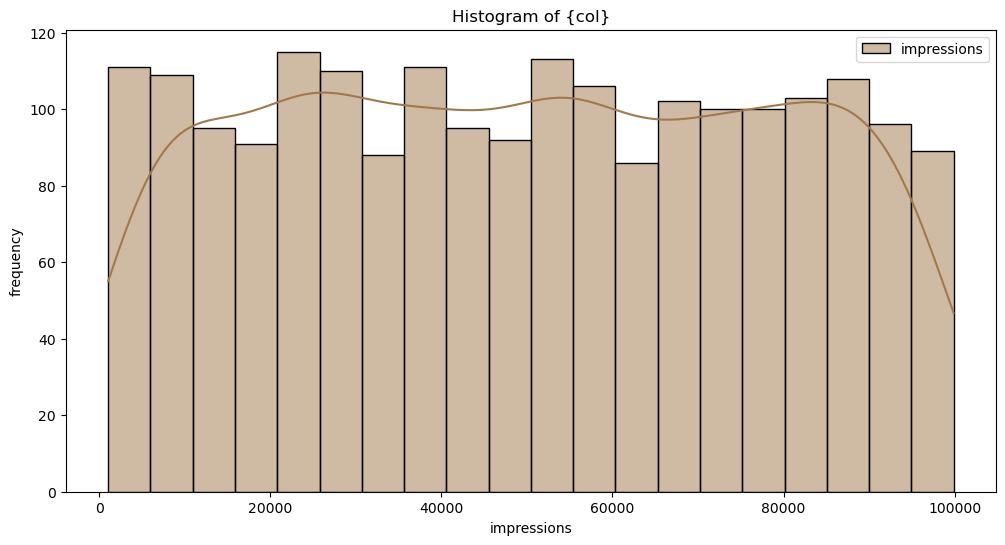

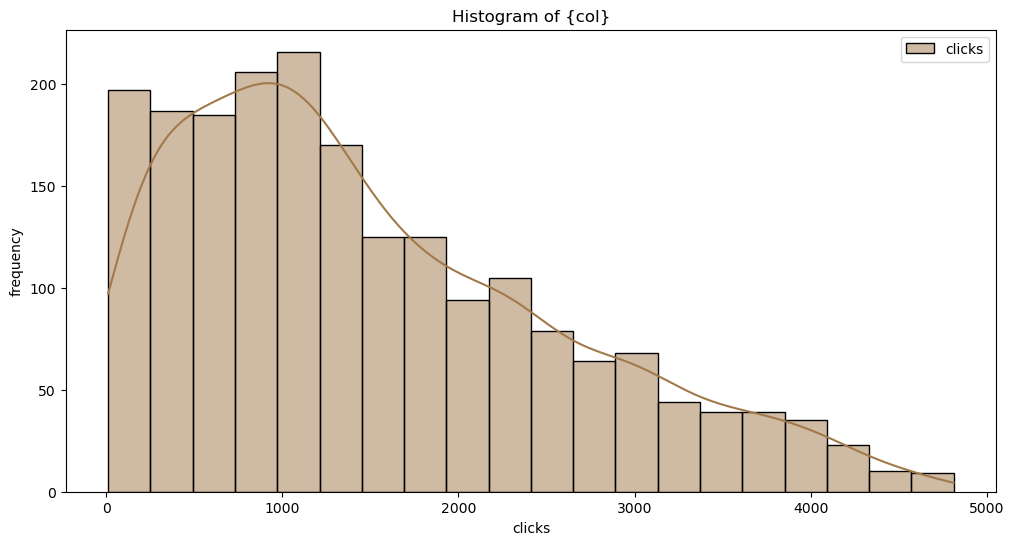

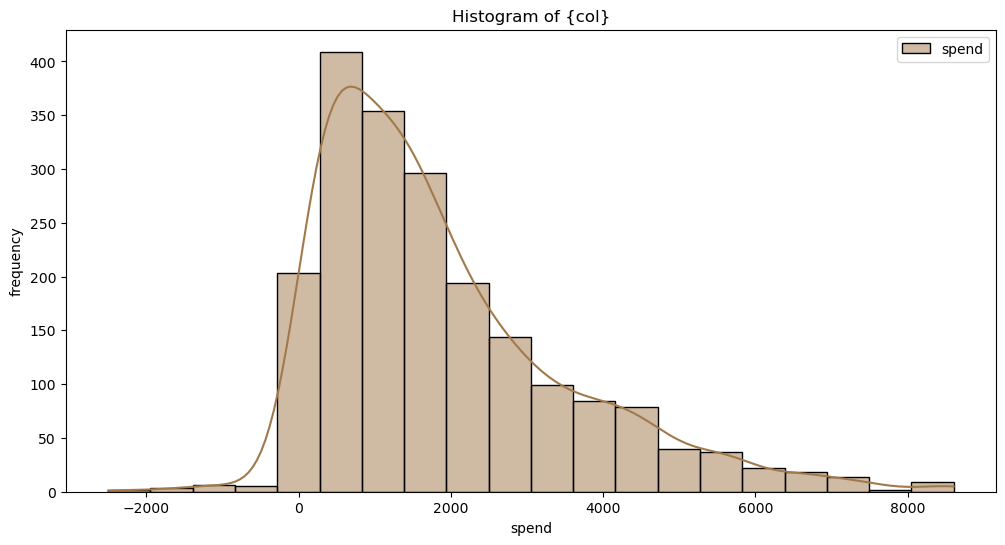

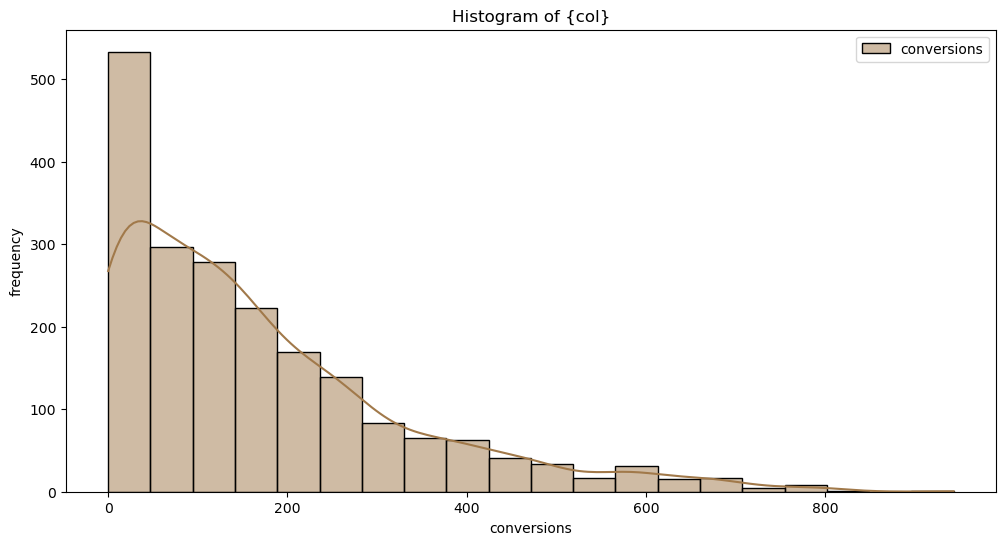

In [33]:
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[[col]], kde=True, palette='cubehelix', bins=20)
    plt.title('Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout
    plt.show()

### 2. Countplot Of Cat_Cols

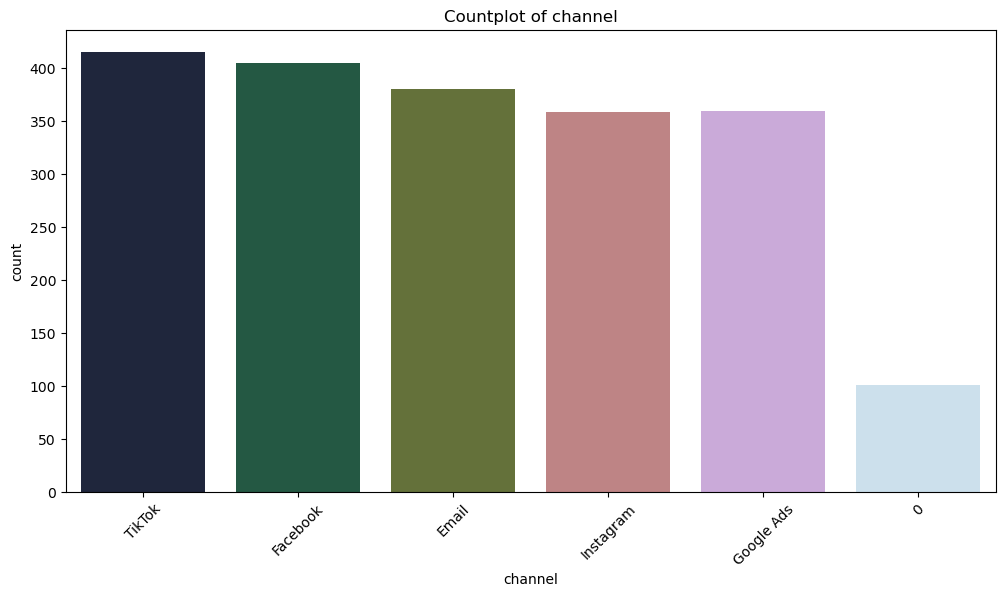

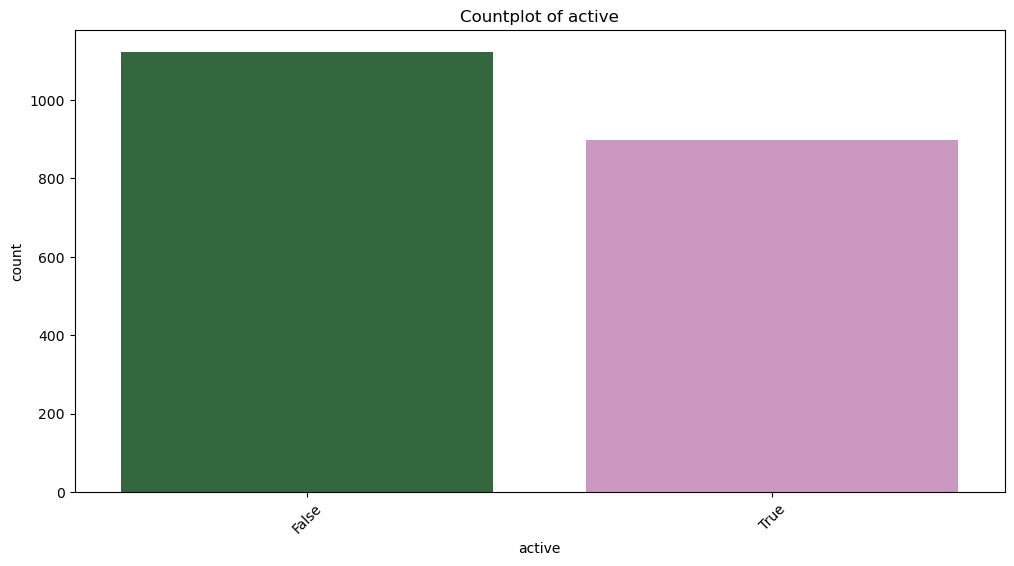

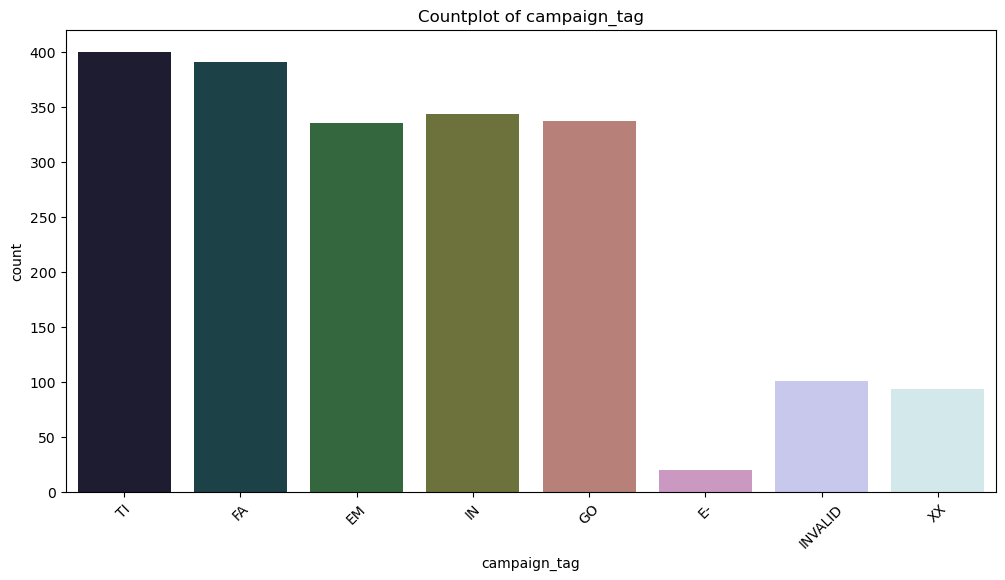

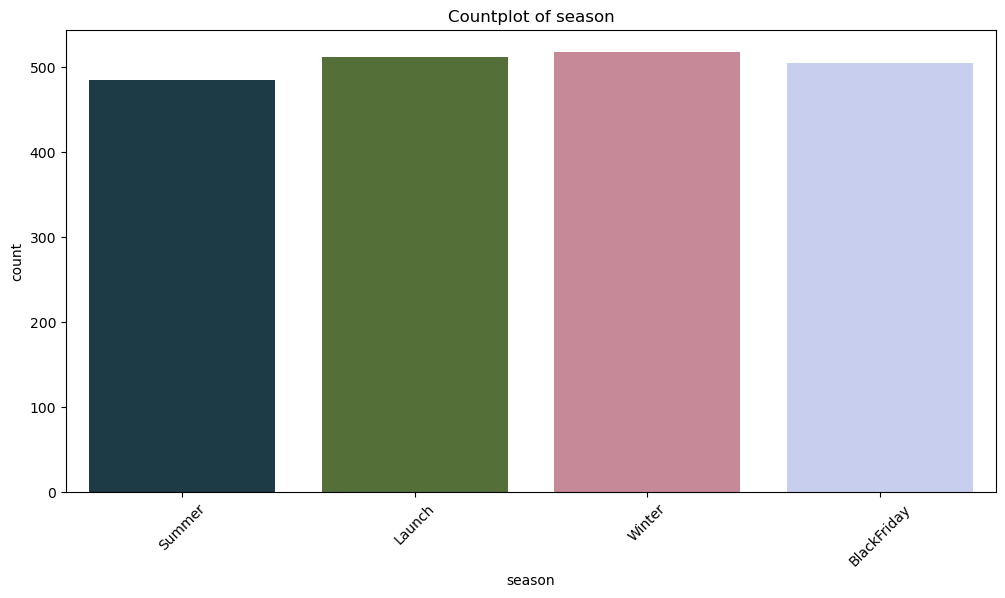

In [34]:
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, palette='cubehelix')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout
    plt.show()

### 3. Impressions By No. Of Clicks

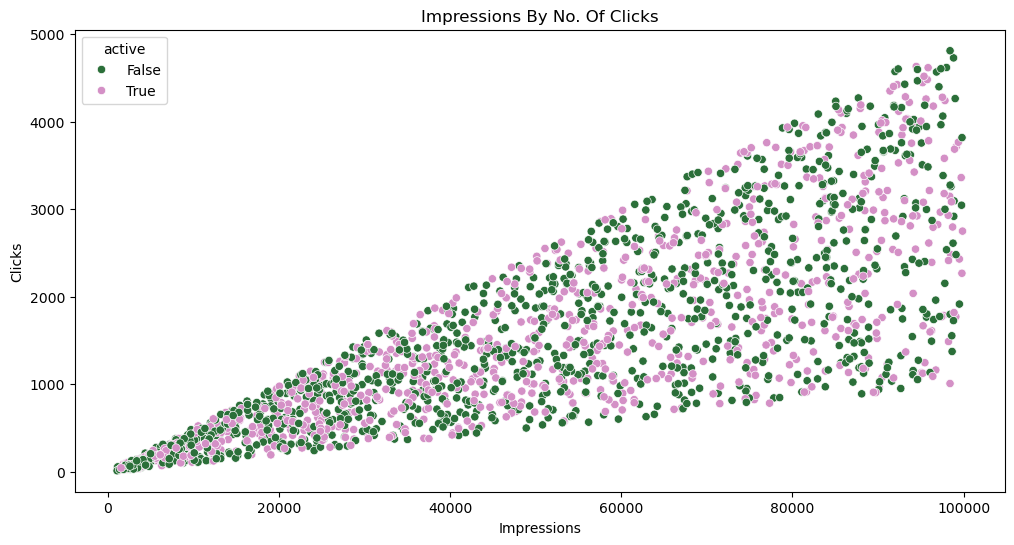

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['impressions'], y=df['clicks'], hue=df['active'], palette='cubehelix')
plt.title('Impressions By No. Of Clicks')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.show()

### 4. Conversions By End Date

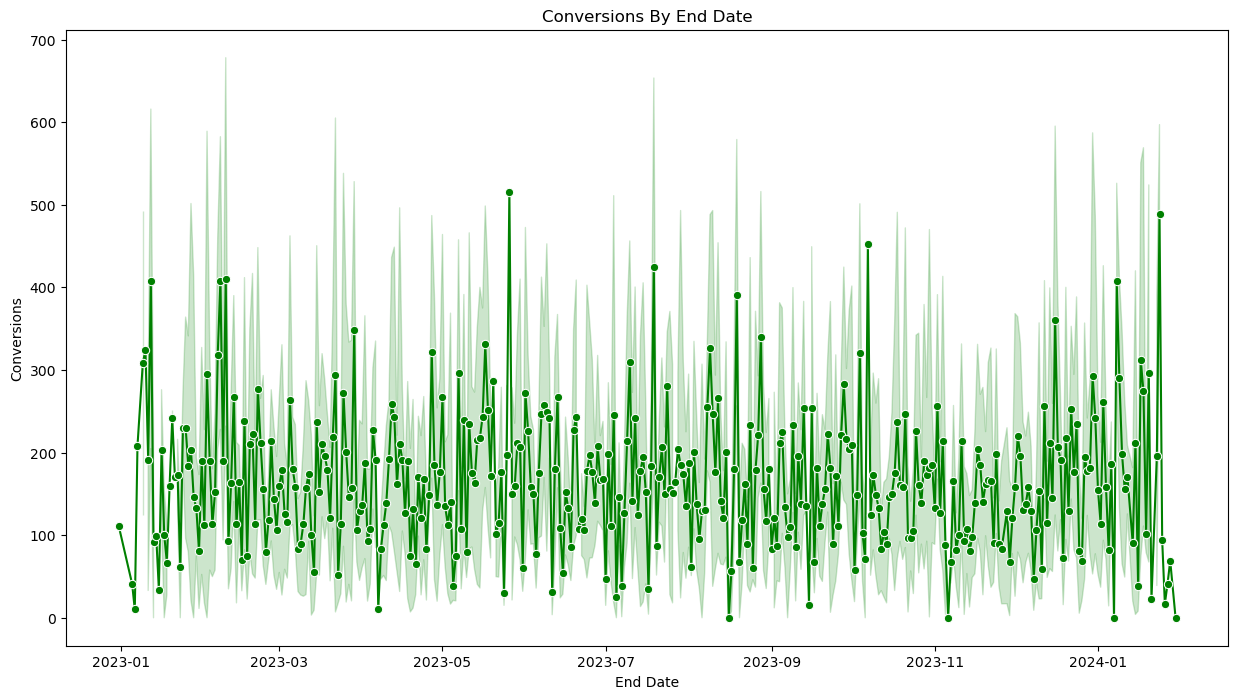

In [40]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=df['end_date'], y=df['conversions'], marker='o', color='green')
plt.title('Conversions By End Date')
plt.xlabel('End Date')
plt.ylabel('Conversions')
plt.show()

### 5. Conversions By Season

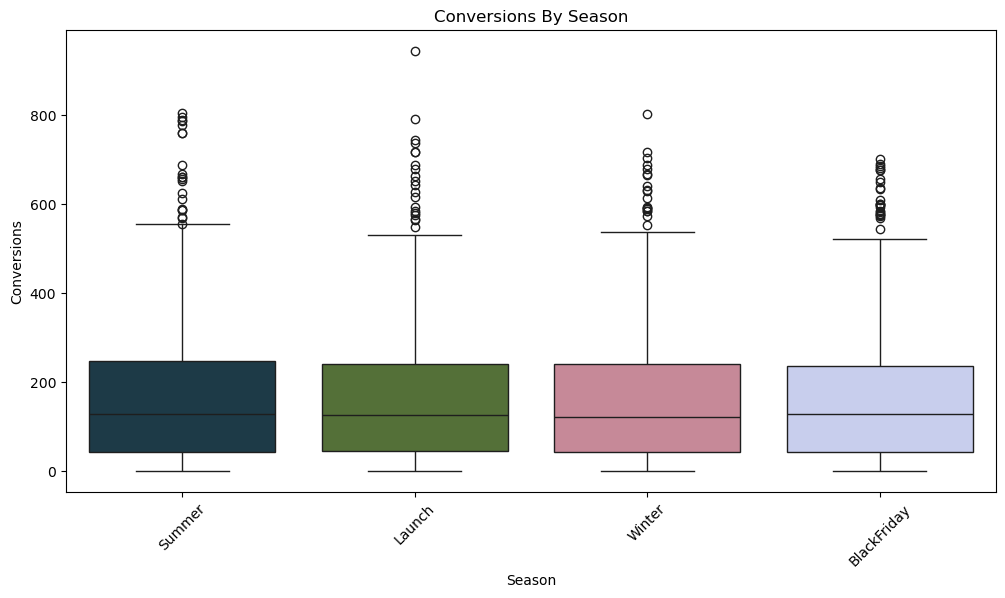

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['season'], y=df['conversions'], data=df, palette='cubehelix')
plt.title('Conversions By Season')
plt.xlabel('Season')
plt.ylabel('Conversions')
plt.xticks(rotation=45)
plt.show()

### 6. Clicks vs Conversions

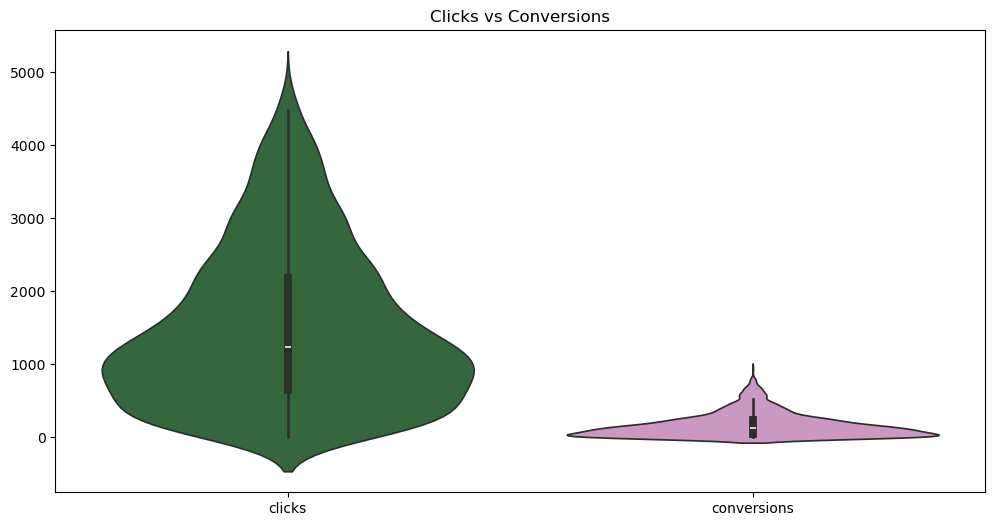

In [44]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['clicks','conversions']], palette='cubehelix')
plt.title('Clicks vs Conversions')
plt.show()

### 7. Correlation Map

In [45]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,impressions,clicks,spend,conversions
0,16795,197,102.82,20.0
1,1860,30,24.33,1.0
2,77820,843,1323.39,51.0
3,55886,2019,2180.38,135.0
4,7265,169,252.44,30.0
...,...,...,...,...
2015,30592,586,503.95,77.0
2016,20097,897,1641.00,162.0
2017,33254,1117,883.82,214.0
2018,68728,2960,4198.50,591.0


In [46]:
correlation = numeric_df.corr()

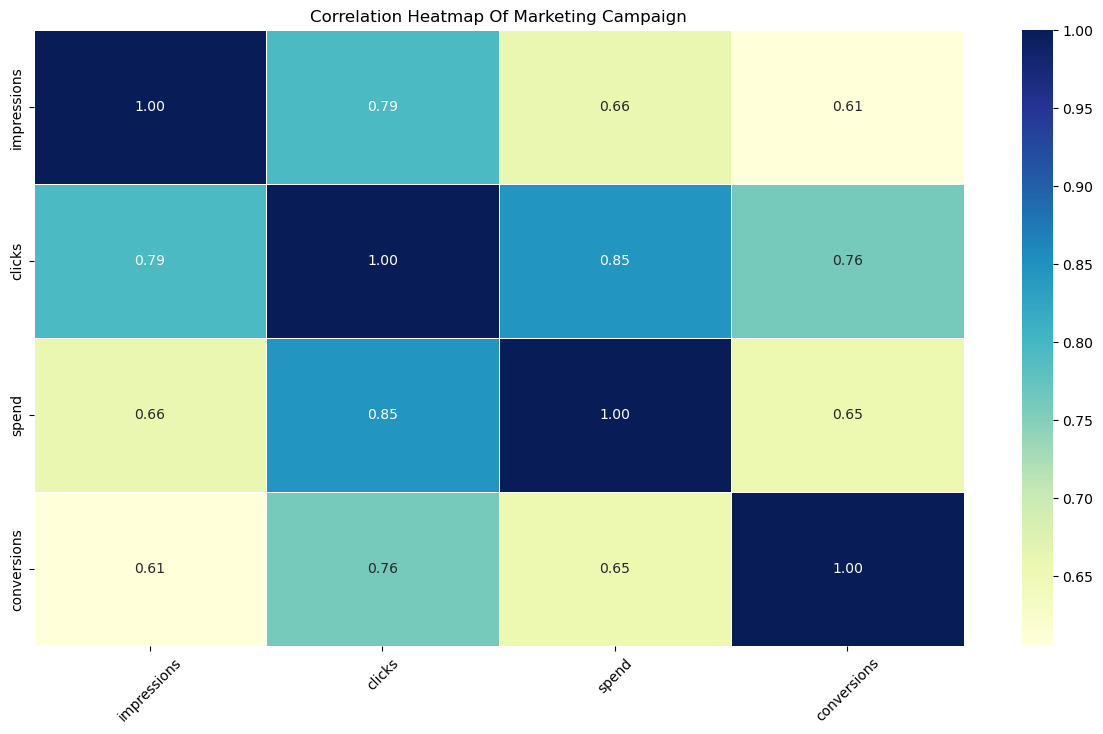

In [47]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap Of Marketing Campaign')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Predictive Modeling

### 1. Train Test Split

In [49]:
df['channel'].unique()

array(['TikTok', 'Facebook', 'Email', 'Instagram', 'Google Ads', 0],
      dtype=object)

In [50]:
df['active'].unique()

array([ True, False])

In [51]:
df['season'].unique()

array(['Summer', 'Launch', 'Winter', 'BlackFriday'], dtype=object)

In [53]:
val = {'channel': {'0': 0, 'TikTok': 1, 'Facebook': 2, 'Email': 3, 'Instagram': 4, 'Google Ads': 5}, 
       'season': {'Summer': 0, 'Launch': 1, 'Winter': 2, 'BlackFriday': 3},
       'active': {'False': 0, 'True': 1}
       }
df.replace(val, inplace=True)
df

,campaign_id,campaign_name,start_date,end_date,channel,impressions,clicks,spend,conversions,active,campaign_tag,season
0,CMP-00001,Q4_Summer_CMP-00001,2023-11-24 00:00:00,2023-12-13,1,16795,197,102.82,20.0,True,TI,0
1,CMP-00002,Q1_Launch_CMP-00002,2023-05-06 00:00:00,2023-05-12,2,1860,30,24.33,1.0,False,FA,1
2,CMP-00003,Q3_Winter_CMP-00003,2023-12-13 00:00:00,2023-12-20,3,77820,843,1323.39,51.0,False,EM,2
3,CMP-00004,Q1_BlackFriday_CMP-00004,0,2023-11-03,1,55886,2019,2180.38,135.0,False,TI,3
4,CMP-00005,Q2_Winter_CMP-00005,2023-04-22 00:00:00,2023-04-23,2,7265,169,252.44,30.0,True,FA,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,CMP-00400,Q3_Summer_CMP-00400,2023-10-31 00:00:00,2023-11-13,1,30592,586,503.95,77.0,True,TI,0
2016,CMP-01255,Q4_Summer_CMP-01255,2023-09-01 00:00:00,2023-09-26,5,20097,897,1641.00,162.0,False,GO,0
2017,CMP-01050,Q2_Launch_CMP-01050,2023-02-09 00:00:00,2023-02-21,4,33254,1117,883.82,214.0,False,IN,1
2018,CMP-01118,Q4_Winter_CMP-01118,2023-03-30 00:00:00,2023-04-27,2,68728,2960,4198.50,591.0,True,FA,2


In [54]:
features = ['channel', 'impressions', 'clicks', 'spend', 'conversions', 'season']

target = 'active'

X = df[features]
y = df[target]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(1616, 6) (404, 6)


### 2. Model

In [56]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
y_pred = rf_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f'R² Score of the Random Forest Regressor: {score:.4f}')

R² Score of the Random Forest Regressor: -0.0363


### 3. Feature Importance

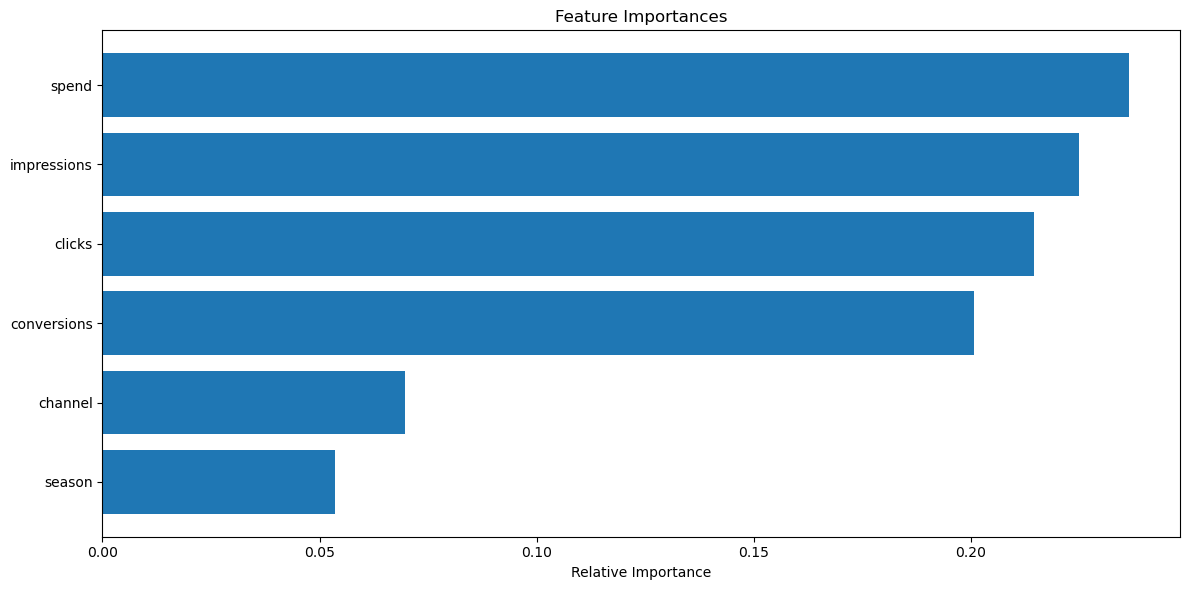

In [58]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()